In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [17]:
# Loading the MNIST data from keras.datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [18]:
# printing the shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


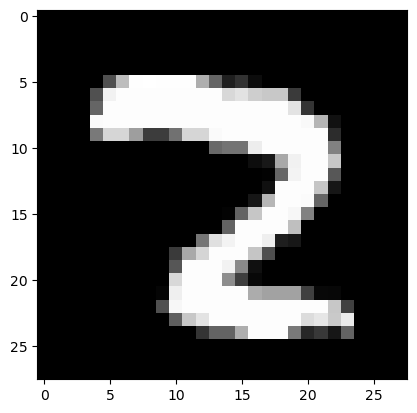

In [19]:
# Displaying the 28th image
plt.imshow(X_train[28], cmap='gray')
plt.show()

In [20]:
# Print the corresponding label
print("Label for the 28th image:", Y_train[28])

Label for the 28th image: 2


In [21]:
# Scaling the values to a range of 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
# Building the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Training the Neural Network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0821 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0681 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0408 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.036

In [25]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test data accuracy:", accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0942 - accuracy: 0.9753
Test data accuracy: 0.9753000140190125


In [26]:
# Function to display a given image and its predicted label
def predict_image(image_path):
    input_image = cv2.imread(image_path)
    
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    input_image_resize = cv2.resize(grayscale, (28, 28))
    input_image_resize = input_image_resize / 255.0

    image_reshaped = np.reshape(input_image_resize, [1, 28, 28])
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    print("The Handwritten Digit is recognized as:", input_pred_label)

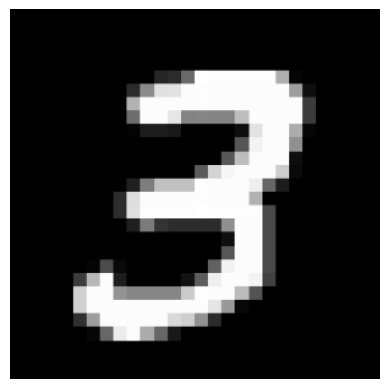

In [ ]:
# Test the Predictive System
input_image_path = 'MNIST_digit.png'  # Replace with the path of the image you want to predict
predict_image(input_image_path)